# Test 6.0


## Theory Question


Question 1: What is Transfer Learning and why is it important?

ans- Transfer learning is a machine learning technique where a pre-trained model, initially developed for one task, is adapted and fine-tuned for a different but related task. This approach leverages the knowledge gained by the model from the initial task to improve performance and reduce training time on the new task.

Transfer learning is important because it enables the use of complex models with limited data, reduces computational resources and time needed for training, and often leads to better model performance due to the reuse of previously learned features.

Question 2: Define Auxiliary Branches, Naive Inception Module, and Dimension Reduction with mathematics.

ans- Auxiliary branches are intermediate classifiers added to the network during training to address the vanishing gradient problem and to regularize the model. They provide additional gradient signals to earlier layers, helping them learn more effectively by calciulating the loss and averaging them.

The naive Inception module is a building block of the Inception network designed to capture multi-scale features by applying convolutional filters of different sizes (e.g.,
1×1
1×1,
3×3
3×3,
5×5
5×5)

Dimension reduction in the context of deep learning, particularly within Inception modules, refers to reducing the number of channels in the input feature map before applying computationally expensive operations like large convolutions. This is typically achieved using
1×1,1×1 convolutions, which help to decrease the computational cost and the number of parameters.

Question 3: Define Reduction Block and specify which architecture it uses.

ans- A reduction block is a component used in convolutional neural networks (CNNs) to reduce the spatial dimensions (height and width) of the input feature maps while simultaneously increasing the depth (number of channels).
Reduction blocks are prominently used in the **Inception-v4** and **Inception-ResNet** architectures.





## Practicle Question

- Load the chess dataset
    

# Step by Step instruction

#### Step 1: Load and Prepare the Dataset using ImageDataGenerator

    Task:
        - Load the Chessman Image Dataset from the specified directory using ImageDataGenerator. Specify the path to the dataset directory.
        - Create instances of ImageDataGenerator for training and validation, including data augmentation techniques.

        -  Generate batches of augmented image data for training and validation
            train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Traning'
                )

            validation_generator = valid_datagen.flow_from_directory(
                valid_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Validation'
                )
        
#### Step 2: Define the Alexnet Architecture

    Task:
        - Construct a basic Alexnet architecture for image classification.Start with an input layer suitable for your dataset dimensions.(use 32  kernel filters with 3 X 3 X 3 kernal filters only on each layer )
        - Stack convolutional layers (Conv2D) followed by pooling layers (MaxPooling2D).
        - Add fully connected layers (Dense) at the end with appropriate activation functions.

#### Step 3: Compile the Model

    Task:
        - Compile the ALexnet model for training.
        - Choose an appropriate optimizer (e.g., Adam).
        - Specify a loss function (e.g., categorical crossentropy) suitable for multi-class classification.
        - Add metrics to monitor during training (e.g., accuracy).

#### Step 4: Train the Model

    Task:
        - Train the Alexnet model using the training data prepared with ImageDataGenerator.
        - Fit the model using model.fit method, passing the training generator.
        - Specify number of epochs and batch size based on computational resources and dataset size.

#### Step 5: Evaluate the Model

    Task:
        - Evaluate the trained model on the validation data.
        - Use model.evaluate to calculate the model's performance metrics on unseen data.
        - Analyze metrics such as accuracy to assess model performance.

#### Step 6: Plot Training and Testing Loss
#### Step 7: Save the model in .h5 extension
#### Step 8: Load the model
#### Step 9: Test the model
    

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:10<00:00, 118MB/s]
100% 1.06G/1.06G [00:10<00:00, 113MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [5]:
# generators helps processing large amont of data
# test dataest
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

# validation dataset
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


* **the images are stored in numpy array which means the numpy array lies between (0-255) but we need to make it between(0-1). in order to achieve that we need to do normalization.**

In [6]:
# normalize
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# **Creating CNN Model**

In [20]:
# Initialize the AlexNet model
model = Sequential()

# 1st conv layer
model.add(Conv2D(32, (11, 11), strides=(4, 4), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# 2nd conv layer
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# 3rd conv layer
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

# 4th conv layer
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

# 5th conv layer
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(128, activation='relu'))

# Fully connected layer 2
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        11648     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 30, 30, 64)        51264     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 256)      

In [22]:
# compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [23]:
# fitting the model
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 55s 83ms/step - loss: 0.6943 - accuracy: 0.4954 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
625/625 [==============================] - 61s 97ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 50s 79ms/step - loss: 0.6932 - accuracy: 0.4973 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 45s 71ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
625/625 [==============================] - 46s 72ms/step - loss: 0.6932 - accuracy: 0.4951 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 43s 68ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==============================] - 47s 75ms/step - loss: 0.6932 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy:

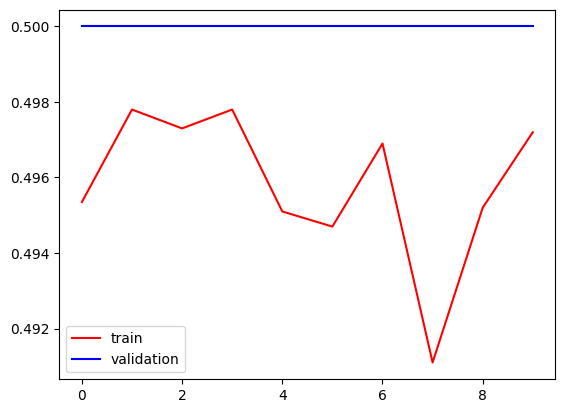

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

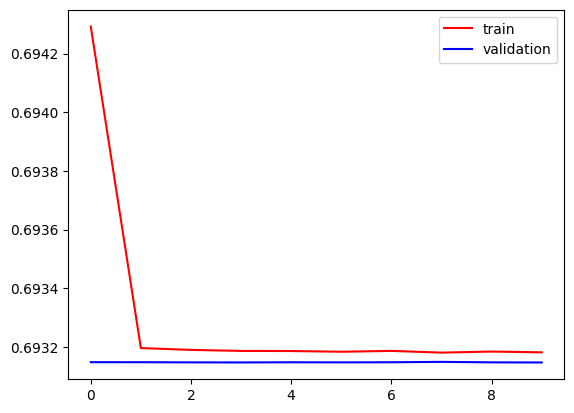

In [25]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# **Testing The Model**

In [26]:
import cv2

In [28]:
test_img = cv2.imread('/content/download.jpeg')

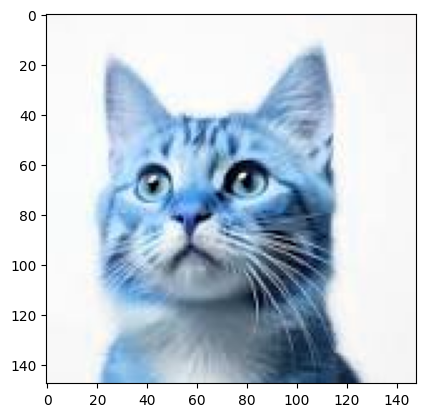

In [29]:
plt.imshow(test_img)

In [30]:
test_img.shape

(148, 148, 3)

In [31]:
test_img = cv2.resize(test_img,(256,256))

In [32]:
test_input = test_img.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 [==============================] - 1s 692ms/step


array([[0.49735367]], dtype=float32)

* **array[0] mean cat. so our model correctly classfied the data.**

In [40]:
#AI/ML Trainer - Saurav
#Date 14 June 2024
#Time - 12:20